In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import histplot


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML

import mlxtend

%matplotlib inline

InteractiveShell.ast_node_interactivity = "all"

from warnings import simplefilter
simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
#Load the dataset
cust_info = pd.read_csv('BankChurners.csv', sep = ',')

In [3]:
cust_info.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
# Remove the two Naive Bayes columns
cust_info.drop(cust_info.columns[[21, 22]], axis = 1, inplace = True)

In [5]:
cust_info.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
cust_info.shape

(10127, 21)

In [7]:
#Count null values in dataframe
cust_info.isnull().sum().sum()

0

In [8]:
cust_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [9]:
#Drop 'CLIENTNUM' as it does not provide relevant data
cust_info.drop(['CLIENTNUM'], axis = 1, inplace = True)

In [10]:
#Verify that numerical columns only contain numerical values
cust_2 = cust_info.applymap(np.isreal).all(axis = 0)

In [11]:
#Split into numerical and object dataframes
num_data = cust_info.iloc(axis = 1)[cust_2.values == True]
obj_data = cust_info.iloc(axis = 1)[cust_2.values == False]
num_data.head()
obj_data.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [12]:
#Check for odd numbers or patterns in the numerical data
num_data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


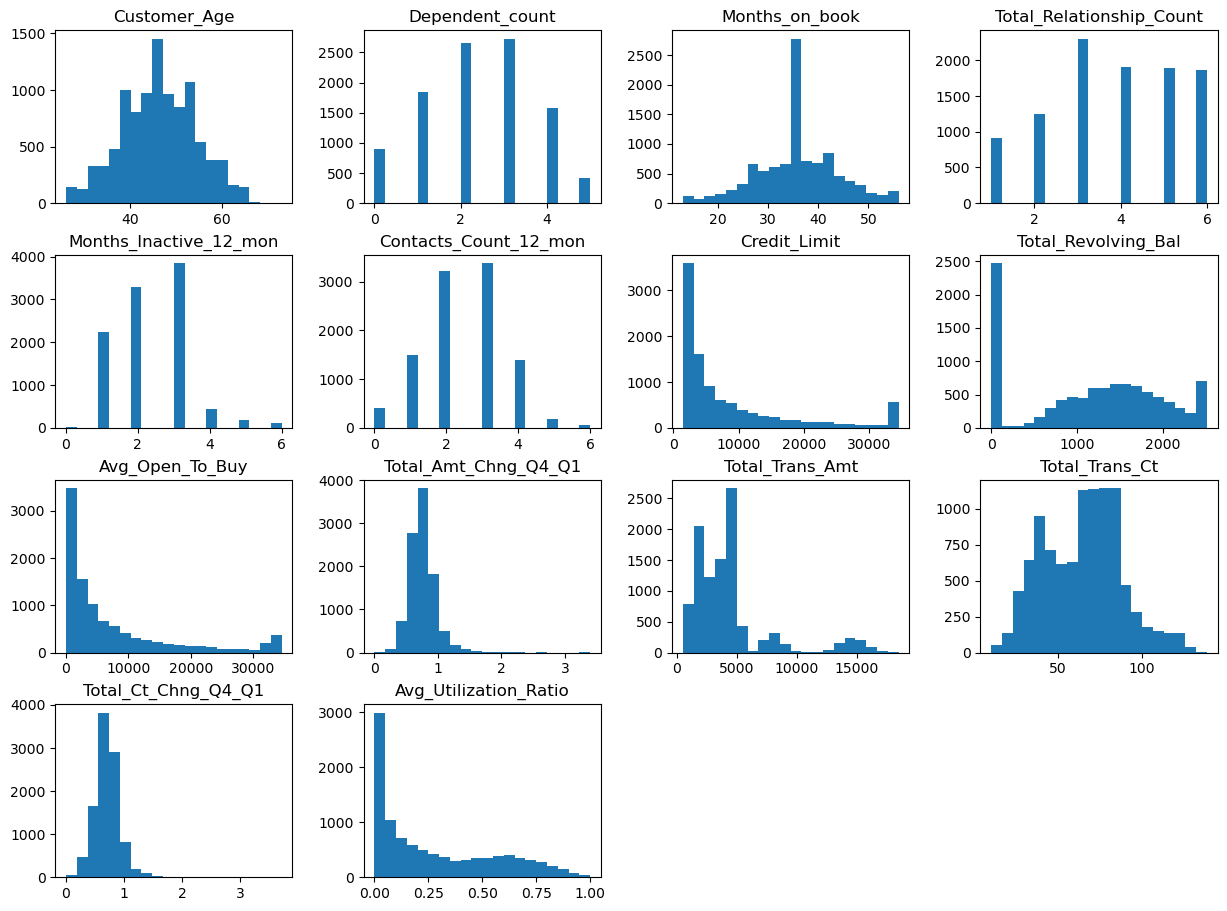

In [13]:
#View histograms of numerical data
hist = num_data.hist(figsize = (15, 11), grid = False, bins = 20)

In [14]:
obj_data.describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


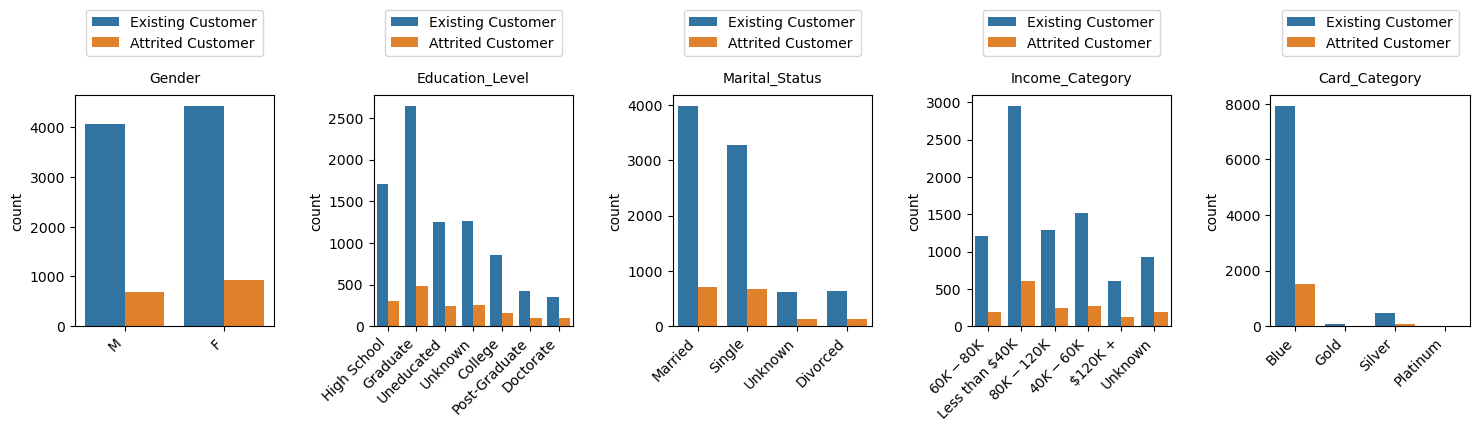

In [15]:
#View bar charts of categorical values split by 'Attrition Flag'
obj_plot = obj_data.iloc[:,1:]

fig, axes = plt.subplots(1, 5, figsize=(18, 3))
plt.subplots_adjust(wspace = .5)



for idx, col in enumerate (obj_plot):  
 
    a = sns.countplot(ax=axes[idx], x=obj_data[col], hue = obj_data['Attrition_Flag'], )
    #axes[idx].set_title(label = col).set_title
    a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
    a.xaxis.set_label_coords(.5, 1.1)
    a.legend(bbox_to_anchor = (.5, 1.4), loc = 'upper center')

plt.show();

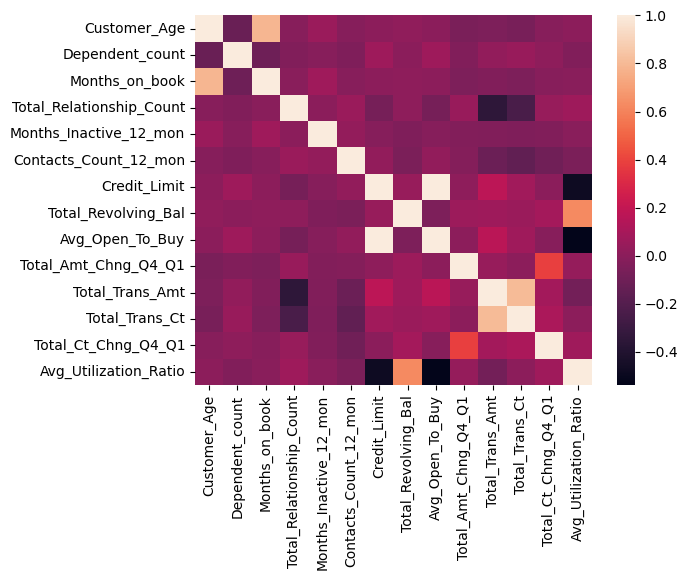

In [16]:
#Check for column correlations
dataplot=sns.heatmap(cust_info.corr())
plt.show()

In [17]:
#Verify that 'Avg_Open_To_Buy' = 'Credit_Limit' - 'Total_Revolving_Bal'
mask = ((cust_info['Credit_Limit'] - cust_info['Total_Revolving_Bal']) == 
        cust_info['Avg_Open_To_Buy'])
mask.all()

False

In [18]:
#Determine number of problem entries
mask.value_counts()

True     10086
False       41
dtype: int64

In [19]:
#Apply rounding to the three columns to rectify the accuracy issue caused by floating point numbers
mask = ((round(cust_info['Credit_Limit']) - 
         round(cust_info['Total_Revolving_Bal']))) == round(cust_info['Avg_Open_To_Buy'])
mask.all()

True

In [20]:
#Drop redundant column
cust_info.drop('Avg_Open_To_Buy', axis = 1, inplace = True)

In [21]:
#Place dataframes side by side 
def side_by_side(*dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 2em">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [22]:
#Count occurences of categorical values
df1 = cust_info['Attrition_Flag'].value_counts().to_frame()
df2 = cust_info['Gender'].value_counts().to_frame()
df3 = cust_info['Education_Level'].value_counts().to_frame()
df4 = cust_info['Marital_Status'].value_counts().to_frame()
df5 = cust_info['Income_Category'].value_counts().to_frame()
df6 = cust_info['Card_Category'].value_counts().to_frame()

side_by_side(df1, df2, df3, df4, df5, df6)

,Attrition_Flag
Existing Customer,8500
Attrited Customer,1627
,Gender
F,5358
M,4769
,Education_Level
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487


<div class="alert alert-block alert-info">
Education_Level and Income_Category have a logical hierarchy and should be converted to numerical values accordingly.  The other four categorical columns can be asigned numerical values in any order.

In [23]:
#Replace 'Unknown' values with NaN
cust_info.replace('Unknown', np.nan, inplace = True)

In [24]:
#Recount nulls after changing unknowns to NaN
cust_info.isnull().sum().sum()

3380

In [25]:
#View nulls by column
cust_info.isnull().sum().to_frame().transpose()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,0,0,0,1519,749,1112,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
#Replace null values with column mode
[cust_info[col].fillna(cust_info[col].mode()[0], inplace = True) for col in cust_info];

In [27]:
#Verify that no null values remain
cust_info.isnull().sum().sum()

0

In [28]:
#Replace categorical values with numerical for columns with a natural hierarchy
cust_info['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1},
                                    inplace = True)
cust_info['Education_Level'].replace({'Uneducated':0, 'High School':1, 'College':2, 'Graduate':3,
                                      'Post-Graduate':4, 'Doctorate':5}, inplace = True)
cust_info['Income_Category'].replace({'Less than $40K':0, '$40K - $60K':1, '$60K - $80K':2,
                                      '$80K - $120K':3, '$120K +':4 }, inplace = True)

In [29]:
#Get dummy values for remaining categorical values
attrition_dummies = pd.get_dummies(cust_info, columns = ['Gender',
                                                         'Marital_Status', 'Card_Category'])
attrition_dummies.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,1,2,39,5,1,3,12691.0,...,0.061,0,1,0,1,0,1,0,0,0
1,0,49,5,3,0,44,6,1,2,8256.0,...,0.105,1,0,0,0,1,1,0,0,0
2,0,51,3,3,3,36,4,1,0,3418.0,...,0.000,0,1,0,1,0,1,0,0,0
3,0,40,4,1,0,34,3,4,1,3313.0,...,0.760,1,0,0,1,0,1,0,0,0
4,0,40,3,0,2,21,5,1,0,4716.0,...,0.000,0,1,0,1,0,1,0,0,0


In [30]:
#Verify that all values are numeric
attrition_dummies.applymap(np.isreal).all(axis = 0)   

Attrition_Flag              True
Customer_Age                True
Dependent_count             True
Education_Level             True
Income_Category             True
Months_on_book              True
Total_Relationship_Count    True
Months_Inactive_12_mon      True
Contacts_Count_12_mon       True
Credit_Limit                True
Total_Revolving_Bal         True
Total_Amt_Chng_Q4_Q1        True
Total_Trans_Amt             True
Total_Trans_Ct              True
Total_Ct_Chng_Q4_Q1         True
Avg_Utilization_Ratio       True
Gender_F                    True
Gender_M                    True
Marital_Status_Divorced     True
Marital_Status_Married      True
Marital_Status_Single       True
Card_Category_Blue          True
Card_Category_Gold          True
Card_Category_Platinum      True
Card_Category_Silver        True
dtype: bool

In [31]:
#Verify that there are no null values
attrition_dummies.isnull().sum().sum()

0

In [32]:
#Split label column from the feature columns
label_raw = attrition_dummies['Attrition_Flag']
feat_raw = attrition_dummies.drop('Attrition_Flag', axis = 1)

In [33]:
#Scale data for processing
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(feat_raw)

In [34]:
#Function to evaluate data using a dummy classifier
dummy_list = []

def dummy_param(*param):
    
    fig, axes = plt.subplots(1, 4, figsize = (18, 3))
    plt.subplots_adjust(wspace = .6)
    
    for idx, par in enumerate(param):
       
        dummy_clf = DummyClassifier(strategy = par, random_state = 2)
        fit = dummy_clf.fit(feat_scaled, label_raw)
        pred = dummy_clf.predict(feat_scaled)
        
        accuracy = np.around(accuracy_score(label_raw, pred), 6)
        prec_bin = np.around(precision_score(label_raw, pred, average = 
                                             'binary', zero_division = 0), 6)
        prec_micro = precision = np.around(precision_score(label_raw, pred, average = 
                                                           'micro', zero_division = 0), 6)
        prec_macro = precision = np.around(precision_score(label_raw, pred, average = 
                                                           'macro', zero_division = 0), 6)
        prec_weighted = precision = np.around(precision_score(label_raw, pred, average = 
                                                              'weighted', zero_division = 0), 6)
        recall = recall_score(label_raw, pred)
        f1 = f1_score(label_raw, pred)
        f2 = fbeta_score(label_raw, pred, beta = 2)
        mat = matthews_corrcoef(label_raw, pred)
        
        dummy_list.append([par, accuracy, prec_bin, prec_micro, prec_macro, prec_weighted, 
                           recall, f1, f2, mat])

        cm = confusion_matrix(label_raw, pred, normalize = 'true')
        
        
        ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2%', ax = axes[idx])
        ax.set_xlabel('Predicted', fontsize=14, labelpad=20)
        ax.xaxis.set_ticklabels(['Existing', 'Attrited'])

   
        ax.set_ylabel('Actual', fontsize=14, labelpad=20)
        ax.yaxis.set_ticklabels(['Existing', 'Attrited'])

        ax.set_title('Dummy classifier '+  par)
         
    return fig

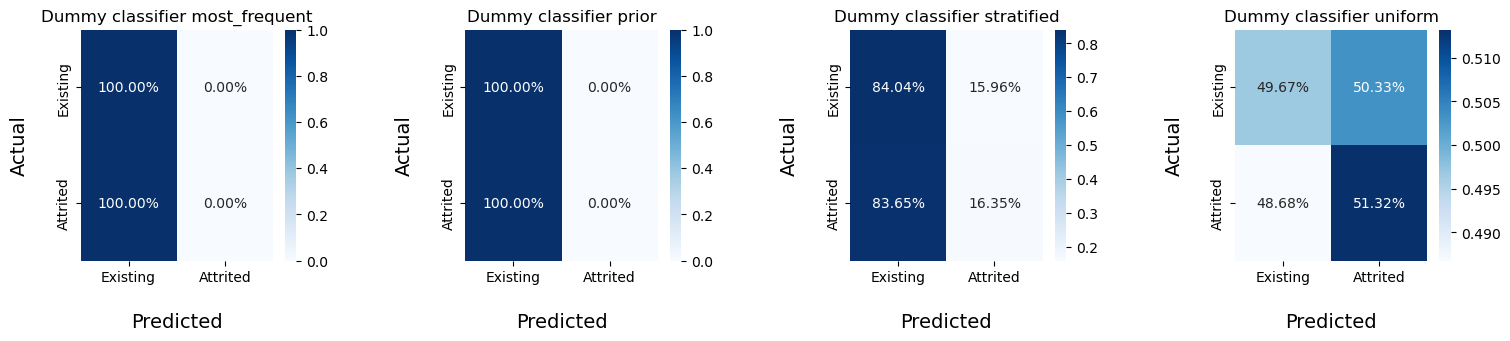

In [35]:
#Run dummy classifier with varying parameters
dummy_cm = dummy_param('most_frequent', 'prior', 'stratified', 'uniform')

In [36]:
#Chart dummy classifier results to use as baseline
col_names = ['Strategy', 'Accuracy', 'Precision(binary)', 'Precision(micro)', 'Precision(macro)',
             'Precision(weighted)', 'Recall', 'f1', 'f2', 'Matthews']

dummy_scores = pd.DataFrame(dummy_list)
dummy_scores.columns = col_names
colors = sns.light_palette('blue', as_cmap = True)
graded = dummy_scores.sort_values('Accuracy',\
                                  ascending = False).style.background_gradient(cmap = colors)
graded

,Strategy,Accuracy,Precision(binary),Precision(micro),Precision(macro),Precision(weighted),Recall,f1,f2,Matthews
0,most_frequent,0.839340,0.000000,0.839340,0.419670,0.704492,0.000000,0.000000,0.000000,0.000000
1,prior,0.839340,0.000000,0.839340,0.419670,0.704492,0.000000,0.000000,0.000000,0.000000
2,stratified,0.731609,0.163894,0.731609,0.501926,0.731342,0.163491,0.163692,0.163572,0.003848
3,uniform,0.499358,0.163309,0.499358,0.502676,0.732997,0.513215,0.247774,0.359263,0.007286


In [37]:
#Create baseline scores dataframe
baseline_scores = pd.DataFrame(dummy_scores.max()).transpose()
baseline_scores.rename(columns = {'Strategy' : 'Name'}, inplace = True)
baseline_scores['Name'] = 'Baseline'
baseline_scores

,Name,Accuracy,Precision(binary),Precision(micro),Precision(macro),Precision(weighted),Recall,f1,f2,Matthews
0,Baseline,0.83934,0.163894,0.83934,0.502676,0.732997,0.513215,0.247774,0.359263,0.007286


In [38]:
#Split data into training and testing groups
feat_train, feat_test, labels_train, labels_test = train_test_split(feat_scaled, label_raw, 
                                                                    test_size = 0.2, random_state = 2)

feat_train.shape[0]
feat_test.shape[0]

8101

2026

In [39]:
#Function to run and assess multiple classifiers
comparison_list = []

def compare_classifiers(name, clf):
        
    clf_test = clf
    fit = clf_test.fit(feat_train, labels_train)
    pred = clf_test.predict(feat_test)
        
    accuracy = np.around(accuracy_score(labels_test, pred), 6)
    prec_bin = np.around(precision_score(labels_test, pred, average = 'binary', 
                                         zero_division = 0), 6)
    prec_micro = precision = np.around(precision_score
                                       (labels_test, pred, average = 'micro',
                                        zero_division = 0), 6)
    prec_macro = precision = np.around(precision_score
                                       (labels_test, pred, average = 'macro',
                                        zero_division = 0), 6)
    prec_weighted = precision = np.around(precision_score
                                          (labels_test, pred, average = 'weighted', 
                                           zero_division = 0), 6)
    recall = recall_score(labels_test, pred)
    f1 = f1_score(labels_test, pred)
    f2 = fbeta_score(labels_test, pred, beta = 2)
    mat = matthews_corrcoef(labels_test, pred)
    
    comparison_list.append([name, accuracy, prec_bin, prec_micro, prec_macro, 
                            prec_weighted, recall, f1, f2, mat])
    
    #Needed only for final tuned classifier
    global pred_val
    pred_val = pred   
    global clf_end
    clf_end = clf

In [40]:
#Create dictionary of classifiers to test
class_dict = {'KNearestNeighbors' : KNeighborsClassifier(),
              'RandomForest' : RandomForestClassifier(),
              'AdaBoost' : AdaBoostClassifier(),
              'ExtraTrees' : ExtraTreesClassifier(),
              'SVCLinear' : SVC(kernel = 'linear'),
              'SVCPoly' : SVC(kernel = 'poly'),
              'SVCRBF' : SVC(kernel = 'rbf')}

In [41]:
#Test classifiers
for name, clf in class_dict.items():
    compare_classifiers(name, clf)

In [42]:
#Compare classifier scores
compare_scores = pd.DataFrame(comparison_list)
col_names[0] = 'Classifier'
compare_scores.columns = col_names

colors = sns.light_palette('blue', as_cmap = True)
graded = compare_scores.sort_values('Accuracy', ascending = False
                                   ).style.background_gradient(cmap = colors)
graded
baseline_scores

,Classifier,Accuracy,Precision(binary),Precision(micro),Precision(macro),Precision(weighted),Recall,f1,f2,Matthews
1,RandomForest,0.958045,0.941634,0.958045,0.951032,0.957535,0.775641,0.850615,0.803987,0.831735
2,AdaBoost,0.954097,0.881533,0.954097,0.923803,0.953054,0.810897,0.844741,0.824104,0.818845
3,ExtraTrees,0.929418,0.933333,0.929418,0.931167,0.929668,0.583333,0.717949,0.630631,0.704619
6,SVCRBF,0.927937,0.848739,0.927937,0.893609,0.924659,0.647436,0.734545,0.679677,0.702239
5,SVCPoly,0.912636,0.816901,0.912636,0.870392,0.907408,0.557692,0.662857,0.595483,0.629503
4,SVCLinear,0.905726,0.776256,0.905726,0.848836,0.899062,0.544872,0.640301,0.579414,0.600164
0,KNearestNeighbors,0.895360,0.774725,0.895360,0.840996,0.886856,0.451923,0.570850,0.493007,0.540272


,Name,Accuracy,Precision(binary),Precision(micro),Precision(macro),Precision(weighted),Recall,f1,f2,Matthews
0,Baseline,0.83934,0.163894,0.83934,0.502676,0.732997,0.513215,0.247774,0.359263,0.007286


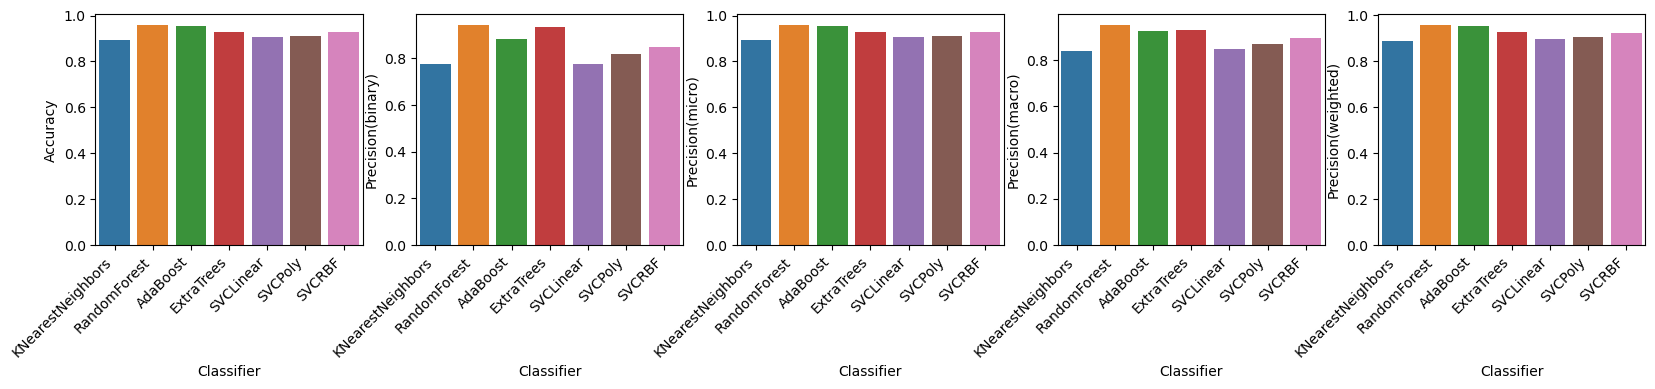

In [43]:
#Plot classifier scores
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
fig.suptitle('')

ax = axes.ravel()

for idx, col in enumerate (compare_scores.iloc[:,1:6]):  
     
        
    a = sns.barplot(ax = ax[idx], data = compare_scores,  x='Classifier', 
                    y = compare_scores[col])
    #axes[idx].set_title(label = col).set_title
    a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show();

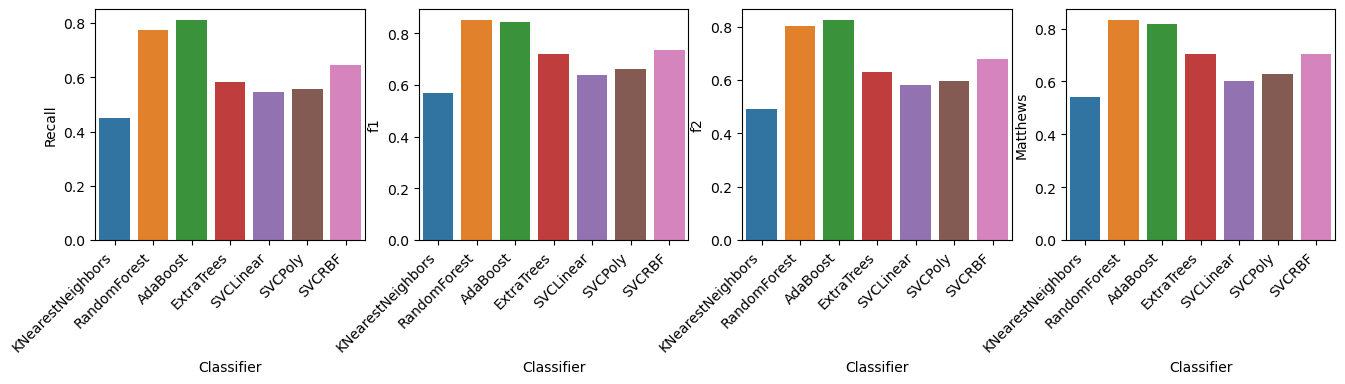

In [44]:
#Plot additional classifier scores
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
fig.suptitle('')

ax = axes.ravel()

for idx, col in enumerate (compare_scores.iloc[:,6:10]):  
     
        
    a = sns.barplot(ax = ax[idx], data = compare_scores,  x='Classifier', 
                    y = compare_scores[col])
    #axes[idx].set_title(label = col).set_title
    a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show();



In [45]:
#Set parameters for grid search with Random Forest classifier
params = {'max_features' : (np.arange(3, 15)), 'class_weight' : ('balanced', None)}

In [46]:
#Run grid search to test parameters
rfc_score = make_scorer(precision_score, average = 'binary', zero_division = 0)
clf = GridSearchCV(RandomForestClassifier(random_state = 2), param_grid = params,
                   error_score = 'raise', scoring = rfc_score)
fit = clf.fit(feat_train, labels_train)

In [47]:
#Obtain best parameters
fit.best_params_
fit.best_score_


{'class_weight': None, 'max_features': 5}

0.9350654924890733

In [48]:
#Run classifier with suggested parameters
compare_classifiers('RandomForest_Tuned', RandomForestClassifier(max_features = 5,
                                                                 random_state = 2))

In [49]:
#Chart tuned classifier preformance vs previous classifiers
compare_scores = pd.DataFrame(comparison_list)
col_names[0] = 'Classifier'
compare_scores.columns = col_names

colors = sns.light_palette('blue', as_cmap = True)
graded = compare_scores.sort_values('Accuracy', ascending = 
                                    False).style.background_gradient(cmap = colors)
graded

,Classifier,Accuracy,Precision(binary),Precision(micro),Precision(macro),Precision(weighted),Recall,f1,f2,Matthews
7,RandomForest_Tuned,0.964462,0.944444,0.964462,0.955992,0.963983,0.817308,0.876289,0.839921,0.858715
1,RandomForest,0.958045,0.941634,0.958045,0.951032,0.957535,0.775641,0.850615,0.803987,0.831735
2,AdaBoost,0.954097,0.881533,0.954097,0.923803,0.953054,0.810897,0.844741,0.824104,0.818845
3,ExtraTrees,0.929418,0.933333,0.929418,0.931167,0.929668,0.583333,0.717949,0.630631,0.704619
6,SVCRBF,0.927937,0.848739,0.927937,0.893609,0.924659,0.647436,0.734545,0.679677,0.702239
5,SVCPoly,0.912636,0.816901,0.912636,0.870392,0.907408,0.557692,0.662857,0.595483,0.629503
4,SVCLinear,0.905726,0.776256,0.905726,0.848836,0.899062,0.544872,0.640301,0.579414,0.600164
0,KNearestNeighbors,0.895360,0.774725,0.895360,0.840996,0.886856,0.451923,0.570850,0.493007,0.540272


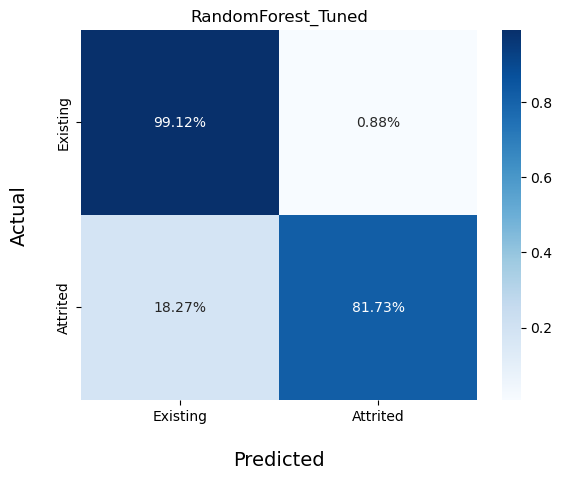

In [50]:


cm = confusion_matrix(labels_test, pred_val, normalize = 'true')



ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt = '.2%')
ax.set_xlabel('Predicted', fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Existing', 'Attrited'])

   
ax.set_ylabel('Actual', fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Existing', 'Attrited'])
ax.set_title('RandomForest_Tuned')
plt.show();

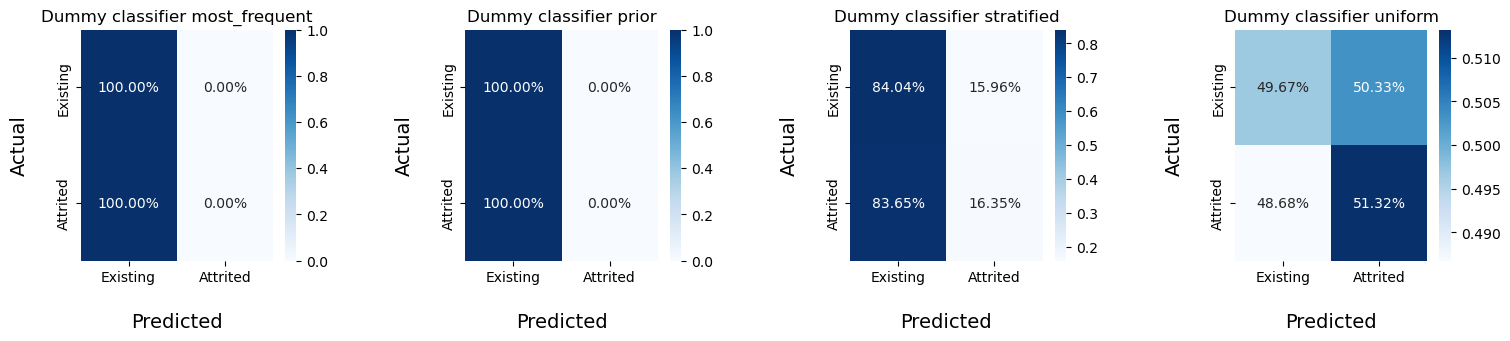

In [51]:
dummy_cm

In [52]:

comp_to_baseline = pd.DataFrame()
comp_to_baseline['Final Model'] = compare_scores.loc[7].iloc[1:]
comp_to_baseline['Baseline'] = baseline_scores.loc[0].iloc[1:]
comp_to_baseline['Difference'] = (comp_to_baseline['Final Model'] -
                                  comp_to_baseline['Baseline'])
comp_to_baseline['Meets Success Criteria'] = (np.where(comp_to_baseline['Difference'] >=
                                                       0.10, 'YES', 'NO')) 
comp_to_baseline.transpose()

,Accuracy,Precision(binary),Precision(micro),Precision(macro),Precision(weighted),Recall,f1,f2,Matthews
Final Model,0.964462,0.944444,0.964462,0.955992,0.963983,0.817308,0.876289,0.839921,0.858715
Baseline,0.83934,0.163894,0.83934,0.502676,0.732997,0.513215,0.247774,0.359263,0.007286
Difference,0.125122,0.78055,0.125122,0.453316,0.230986,0.304093,0.628514,0.480658,0.851428
Meets Success Criteria,YES,YES,YES,YES,YES,YES,YES,YES,YES


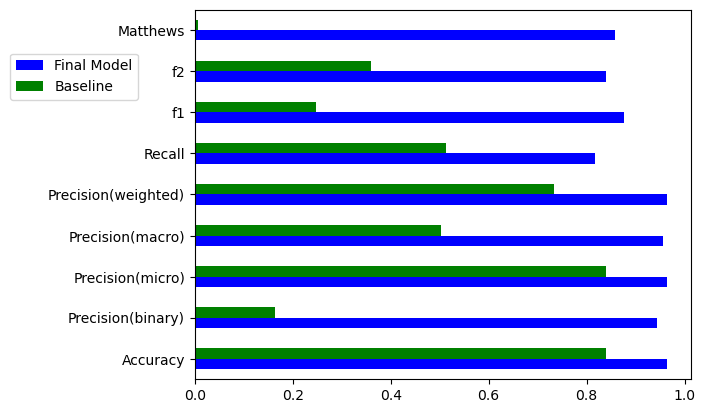

In [53]:
#Plot classifier scores

comp_to_baseline.plot(y = ['Final Model', 'Baseline'], kind = 'barh', color = ['blue', 'green'] )
plt.legend(bbox_to_anchor = (-.1, .9));

In [54]:
if sum(comp_to_baseline['Meets Success Criteria'] == 'YES') >= 7:
    print('THE PROJECT WAS SUCCESSFUL')
else:
    print('THE PROJECT WAS NOT SUCCESSFUL')


THE PROJECT WAS SUCCESSFUL
